In [39]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
rcParams['font.size'] = 10
#rcParams['font.family'] = 'sans-serif'
import json



In [40]:
# get parameters
with open("data.json", OpenTextMode="r") as f:
  data = json.load(f)

dt = data["dt_hdf5"]
nx = data["nx_elem"] + 1
ny = data["ny_elem"] + 1
nz = data["nz_elem"] + 1

xmin = data["xmin"]
xmax = data["xmax"]
ymin = data["ymin"]
ymax = data["ymax"]
zmin = data["zmin"]
zmax = data["zmax"]

sigma = data["sigma"]

nx = data["nx_elem"] + 1
ny = data["ny_elem"] + 1
nz = data["nz_elem"] + 1

dt=data["dt_hdf5"]

xscale = np.linspace(xmin, xmax, num =nx, endpoint=True)
yscale = np.linspace(ymin, ymax, num =ny, endpoint=True)
zscale = np.linspace(zmin, zmax, num =nz, endpoint=True)

In [41]:
# load pressure files
pyz = np.load("pyz.npy")
pxz = np.load("pxz.npy")
pxy = np.load("pxy.npy")
print("pyz.shape = " + str(pyz.shape))
ndt = pyz.shape[0]

pyz.shape = (64, 62, 62)


In [42]:
ix=int(nx/2)
iy=int(ny/2)
iz=int(nz/2)
nt=ndt

def plotWfld(pyz, pxz, pxy,it,output="figure",save=False):

    vmax=np.percentile(np.abs(pxy[it,::]), 99.5)
    time=it*dt
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    image = ax[0].imshow(np.transpose(pyz[it,:,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[ymin, ymax, zmin, zmax])
    ax[0].grid(visible=True)
    ax[0].set_xlabel("Y")
    ax[0].set_ylabel("Z")
    ax[0].set_title(r"X-slice @ %0.2f sec" %time)
    fig.colorbar(image, ax=ax[0], location='right', anchor=(0, 0.3), shrink=0.7)

    vmax=np.percentile(np.abs(pxz[it,::]), 99.5)
    image = ax[1].imshow(np.transpose(pxz[it,:,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[xmin, xmax, zmin, zmax])
    ax[1].grid(visible=True)
    ax[1].set_xlabel("X")
    ax[1].set_ylabel("Z")
    ax[1].set_title(r"Y-slice @ %0.2f sec" %time)
    fig.colorbar(image, ax=ax[1], location='right', anchor=(0, 0.3), shrink=0.7)

    vmax=np.percentile(np.abs(pxy[it,::]), 99.5)
    image = ax[2].imshow(np.transpose(pxy[it,:,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[xmin, xmax, ymin, ymax])
    ax[2].tick_params('both', length=2, width=0.5, which='major',labelsize=10)
    ax[2].grid(visible=True)
    ax[2].set_xlabel("X")
    ax[2].set_ylabel("Y")
    ax[2].set_title(r"Z-slice @ %0.2f sec" %time)
    fig.colorbar(image, ax=ax[2], location='right', anchor=(0, 0.3), shrink=0.7)

    # plt.tight_layout()
    # if save==True:
    #     plt.savefig("./fig/"+output+"_%d" %it)
    
widgets.interact(plotWfld, pyz=widgets.fixed(pyz), pxz=widgets.fixed(pxz), pxy=widgets.fixed(pxy), it=(0,nt-2,1))

interactive(children=(IntSlider(value=31, description='it', max=62), Text(value='figure', description='output'…

<function __main__.plotWfld(pyz, pxz, pxy, it, output='figure', save=False)>

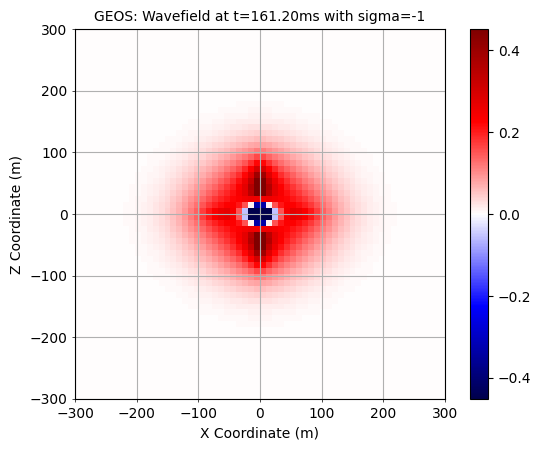

In [43]:
time_target = 0.82 # in seconds
it = np.minimum(int(time_target/dt), nt-2)
time = it*dt
vmax=np.percentile(np.abs(pxz[it,::]), 99.5)

fig, ax = plt.subplots()
pos = ax.imshow(np.transpose(pxz[it,:,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[xmin, xmax, zmin, zmax])
ax.tick_params('both', length=2, width=0.5, which='major',labelsize=10)
ax.set_title("GEOS: Wavefield at t="+str(format(time*1000., '.2f'))+"ms with sigma="+str(sigma),fontsize=10)
ax.set_xlabel("X Coordinate (m)",fontsize=10)
ax.set_ylabel("Z Coordinate (m)",fontsize=10)
ax.grid()
fig.colorbar(pos, ax=ax)

fig.savefig("geos-sigma"+str(sigma)+".png")


